# Linear Model 

## Background
A single-input, single-output linear function is simple. 
Its two parameters, weight(slope) and bias(y-intercept), tell the entire story of the relationship between the input and the output. 
It is yet powerful.
It reveals natural philosophy with mathematical principles. 
- Galileo Galilei defined the relationship of an object's velocity and its constant acceleration.
- Johannes Kepler described a general planet's motion given the square of its orbital period and the cube of the length of the semi-major axis of its orbit. 
- Isaac Newton connected the acceleration of an object to the net force acting on it and its mass.

It is also the simplest format of an artificial neural network model.
It serves as the basic building block for more complex deep learning models.
By searching for an appropriate combination of the weight and bias parameters, an intimate relationship between two quantities will be established.
Now, let's practice training a deep learning model.
In the following exercises, a linear model will be trained to predict a used car's price based on its age.

## Objectives
- Be able to train a neural network model with the simplest form: single-in, single-out linear function.
    - Initialize weight and bias parameters.
    - Use a loss function to evaluate the model's performance.
    - Optimize the weight and bias parameters using gradient descent algorithm.
- Get more used to vectorization using NumPy.

## Instructions
- Write your code only between the commented lines: `###START CODE HERE###` and `###END CODE HERE###`.
- Replace `None`s with appropriate variables or operations.
- <font color='red'>Modify code out of the designated area at your own risk.</font>
- Reference answers are provided after a certain coding blocks.

## Exercises:
1. <font color='violet'>(10%) Data Pre-Processing</font>
2. <font color='violet'>(10%) Create a Linear Model</font>
3. <font color='violet'>(10%) Define Mean Square Error Loss}</font>
4. <font color='violet'>(20%) Compute Loss Derivatives</font>
5. <font color='violet'>(40%) Implement Gradient Descent Algorithm</font>
6. <font color='violet'>(10%) Test Model with New Data</font>





## 1 - Load Data
Load the dataset: $\mathcal{D} = \{(^{(1)} x, ^{(1)} y), (^{(2)} x, ^{(2)} y), ..., (^{(M)} x, ^{(M)} y)\}$, which contains $M$ samples (cars).
Each sample consists with a feature (age): $^{(m)} x$, and the corresponding label (price): $^{(m)} y$, where $m \in \{1, 2, ..., M\}$.

The raw data is stored in numpy arrays. 
Let's first load these arrays. 
Then, visulize the raw data.


dimension of raw features: 1, shape of raw features: (268577,)
dimension of raw labels: 1, shape of raw labels: (268577,)
fisrt 5 samples: (array([13.,  6.,  5.,  4.,  9.]), array([ 3500, 26000, 24971, 39990,  8495]))


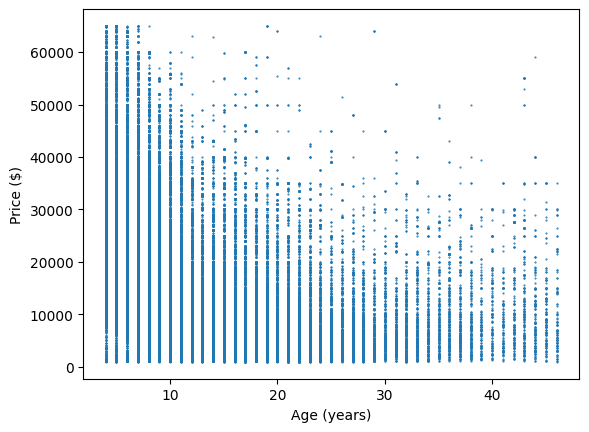

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Load the  raw data (year, price)
X_raw = np.load("ages_train.npy")
y_raw = np.load("prices_train.npy")
print(f"dimension of raw features: {X_raw.ndim}, shape of raw features: {X_raw.shape}")
print(f"dimension of raw labels: {y_raw.ndim}, shape of raw labels: {y_raw.shape}")
print(f"fisrt 5 samples: {X_raw[:5], y_raw[:5]}")

# Visualize the  raw data
plt.xlabel("Age (years)")
plt.ylabel("Price ($)")
plt.plot(X_raw, y_raw, '.', markersize=1)

As the raw data (feature and label) have different scales, we would like to rescale all the features (ages) and the labels (prices) to roughly between 0 and 10. 

In [3]:
X_rescale = X_raw / 10    # rescale to per decade
y_rescale = y_raw / 1e4  # rescale to per $10,000
print(f"fisrt 5 rescaled samples: {X_rescale[:5], y_rescale[:5]}")


fisrt 5 rescaled samples: (array([1.3, 0.6, 0.5, 0.4, 0.9]), array([0.35  , 2.6   , 2.4971, 3.999 , 0.8495]))


### <font color='violet'>(10%) Exercise 1: Pre-Process Data</font>
Let's reshape the raw feature and label arrays into 2-dimensional (2d) numpy arrays (So that they look the same as the column vectors in your linear algebra class). After reshaping, the 1st dimension will contain $M$ elements, and the 2nd dimension will contain only 1 element.  


In [ ]:
### START CODE HERE ### (≈ 2 line of code)
X_reshape = None
y_reshape = None
### END CODE HERE ###
print(f"dimension of processed features: {X_reshape.ndim}, shape of processed features: {X_reshape.shape}")
print(f"dimension of processed labels: {y_reshape.ndim}, shape of processed labels: {y_reshape.shape}")
print(f"fisrt 5 processed samples: \n{X_reshape[:5]} \n\n{y_reshape[:5]}")

# Visualize the processed data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_reshape, y_reshape, '.', markersize=1)


**Expected Output**:
>
```console
dimension of processed features: 2, shape of processed features: (268577, 1)
dimension of processed labels: 2, shape of processed labels: (268577, 1)
fisrt 5 processed samples: 
[[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]] 

[[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]
```

## 2 - Create a Linear Model
#### $\color{violet}{\textbf{(10\%) Exercise 2: Create a Linear Model}}$
Create a linear model: $\hat{\mathbf{y}} = w\mathbf{x} + b$ governed by the weight parameter, $w$ and bias parameter, $b$. The input feature (age) is $\mathbf{x}$, and the predicted output (price) is $\hat{\mathbf{y}}$.


In [ ]:
def linear(input, weight, bias):
    """
    Linear model function
        Args:
            input: input features to linear model, (2d) numpy array
            weight: weight of linear model, scalar
            bias: bias of linear model, scalar
        Returns:
            output: predicted output from linear model, (2d) numpy array
    """
    ### START CODE HERE ### (≈ 1 line of code)
    output = None
    ### END CODE HERE ###
    return output

# Sanity check
print(f"The model's output from 4 input values: \n{linear(np.linspace(-0.2, 0.2, 4).reshape(-1, 1), 2, -3)}")

**Expected Output**:
>
```console
The model's output from 4 input values: 
[[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]
```

## 3 - Evaluate the Model
We need a criterion to evaluate the performance of the model. Mean square error function: $\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y}) = \frac{1}{M}\Sigma_{i=1}^M \frac{1}{2} (^{(i)}\hat{ y} - ^{(i)}y)^2$ is usually applied to calculate the averaged error between the model predictions and ground true labels.

#### $\color{violet}{\textbf{(10\%) Exercise 3: Calculate Mean Square Error Loss}}$
Please define a function to compute MSE loss between the predictions and the labeled ground truths.

In [ ]:
def mse_loss(pred, label):
    """
    Mean square error (MSE) function
        Args:
            pred: model predicted output, (2d) numpy array
            label: true label, (2d) numpy array
        Returns:
            loss_value: averaged MSE error, scalar
    """
    ### START CODE HERE ### (≈ 1 line of code)
    loss_value = None
    ### END CODE HERE ###
    return loss_value

# Sanity check
w = -0.8
b = 3.6
X_dummy = np.linspace(2, 4, 10).reshape(-1, 1)  # fake data for sanity check
y_dummy = np.linspace(10, 3, 10).reshape(-1, 1)
# Visualize the model
plt.plot(X_dummy, y_dummy, 'o')
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['dummy data', 'model'])
print(f"Model's MSE loss: {mse_loss(pred=linear(X_dummy, w, b), label=y_dummy)}")

**Expected Output**:
>
```console
Model's MSE loss: 15.530000000000001
```

## 4 - Gradient Descent Optimization
We need to calculate the gradient of the loss function $\mathcal{L}$ (derivatives with respect to $w$ and $b$). The purpose of doing so is to determine directions that increment $w$ and $b$ to reduce the MSE loss of the model. The gradient of the loss function can be computed as:

$\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{M} \Sigma_{i=1}^M (^{(i)}\hat{ y} - ^{(i)}y) ^{(i)}x$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M} \Sigma_{i=1}^M (^{(i)}\hat{ y} - ^{(i)}y)$



#### $\color{violet}{\textbf{(20\%) Exercise 4: Compute Loss Gradient}}$
Please define a function to compute gradient (derivatives) of the loss: $\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$


In [ ]:
def grad(input, label, pred):
    """
    Compute gradient of loss function
        Args:
            input: input feature to linear model, (2d) numpy array
            label: true label, (2d) numpy array
            pred: model predicted output, (2d) numpy array
        Returns:
            dL_dw: dL/dw, scalar
            dL_db: dL/db, scalar
    """
    ### START CODE HERE ### (≈ 2 lines of code)
    dL_dw = None  # dL/dw
    dL_db = None  # dL/db
    ### END CODE HERE ###

    return dL_dw, dL_db

# Sanity check
dw, db = grad(X_dummy, y_dummy, linear(X_dummy, w, b))
print(f"dL/dw = {dw}, dL/db = {db}")

**Expected Output**:
>
```console
dL/dw = -14.8, dL/db = -5.300000000000001
```

#### $\color{violet}{\textbf{(40\%) Exercise 5: Implement Gradient Descent Algorithm}}$
To optimize $w$ and $b$, we need to perform gradient descent algorithm:

$\textbf{Initialize } w, b$

$\text{\textbf{Repeat} until converge } \{$

&nbsp; &nbsp; &nbsp; &nbsp; $\text{compute } \frac{\partial \mathcal{L}}{\partial w} \text{, and } \frac{\partial \mathcal{L}}{\partial b}$

&nbsp; &nbsp; &nbsp; &nbsp; $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$

&nbsp; &nbsp; &nbsp; &nbsp; $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

$\}$

where $\alpha$ is the learning rate (step size).

The goal is to bring the loss down **below 0.53**. 
> You may need to experiment this process a few times to find a good training profile. 


In [ ]:
np.random.seed(3321)
# Initialize training data, linear model and storage
X_train = X_reshape
y_train = y_reshape
w = np.random.normal(loc=0, scale=1e-4)
b = np.random.normal(loc=0, scale=1e-4)
print(f"initial w = {w}, b = {b}")
losses = []  # storage for loss at each iteration

### START CODE HERE ### (≈ 7 lines of code)
num_iters = None
alpha = None  # learning rate
for i in range(num_iters):
    preds = None  # linear model predictions
    loss = None  # evaluate model
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)  # save loss 
    dw, db = None  # loss gradient w.r.t. weight, bias
    w = None  # update weight
    b = None  # update bias
### END CODE HERE ###
print(f"final w = {w}, b = {b}")

# To visualize changing of the loss
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.plot(losses, 'tan')
plt.legend(['MSE'])


## 5 - Evaluate and Test the Model
Let's first evaluate the model using the training dataset.


In [ ]:
print(f"On the training dataset, the model predicted price is different from the actual price: ${mse_loss(pred=linear(X_train, w, b), label=y_train) * 2 ** 0.5 * 1e4} in average")

# To visualize the model for how it fits to the training data
plt.plot(X_train, y_train, '.', markersize=1)
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
plt.legend(['data', 'model'])


#### $\color{violet}{\textbf{(10\%) Exercise 6: Test Model with New Data}}$
Now, let's test the model with a new set of data.


In [ ]:
# Load test dataset
X_test = np.load("ages_test.npy").reshape(-1, 1) / 10  # rescale to per decade
y_test = np.load("prices_test.npy").reshape(-1, 1) / 1e4  # rescale to per $10,000
print(f"dimension of test features: {X_test.ndim}, shape of test features: {X_test.shape}")
print(f"dimension of test labels: {y_test.ndim}, shape of test labels: {y_test.shape}")

# Calculate mse loss of the model using the test data
### START CODE HERE ### (≈ 2 lines of code)
preds_test = None
loss_test = None
### END CODE HERE ###
print(f"On the test dataset, the model predicted price is different from the actual price: ${mse_loss(pred=linear(X_test, w, b), label=y_test) * 2 ** 0.5 * 1e4} in average")

# To visualize the model for how it fits to the test data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_test, y_test, '.', markersize=1)
plt.plot([0, 5], linear(np.array([0, 5]), w, b), 'r')

> You may observe that the model did somehow catch the relationship between ages and prices of the cars. However, it does not make sense to predict negative price for the cars older than 3 decades. We'll investigate approaches to avoid this in the future.  

# Congratulations! You have finished this assignment!